In [167]:
import os,json
import pylab as plt
%matplotlib inline  
from sbmtm import sbmtm
import graph_tool.all as gt
import collections

def calculate_bin_indices(ordered_dictionary,count_docs,bins=10):
    
    # first we calculate the bin counts
    min_split_count = int(count_docs/bins)
    extras = count_docs - min_split_count*bins
    
    counts = [min_split_count for i in range(bins)]
    for indx in random.sample(range(bins),extras):
        counts[indx] += 1
    
    # next we figure out the indices of the docs that belong in that bin
    bin_indices=[]
    tracker = 0 # tracking which indice we're at
    od_keys = list(ordered_dictionary.keys())
    #print(od_keys)
    #print(ordered_dictionary)
    
    # we start by iterating over the bin counts
    for cnt in counts:
        inds = []
        count_in = 0
        while count_in < cnt:
            indices = ordered_dictionary[od_keys[tracker]]
            #print(indices)
            if count_in + len(indices) < cnt:
                inds.extend(indices)
                count_in += len(indices)
                tracker+=1
            else:
                remaining = cnt-count_in
                for i in range(remaining):
                    
                    inds.append(indices.pop(0))
                # we don't increment tracker because we'll start with this list for the next bin
                count_in += remaining
            # We now have a list of document indices of length *count* and we save it
        #print(inds)
        bin_indices.append(inds)
            
    return (bin_indices, min_split_count)

def order_documents(documents):
    name_to_indx = collections.defaultdict(list)
    for indx, doc in enumerate(model.documents):
        splits = doc.split("_")
        delta = int(splits[0])
        name_to_indx[delta].append(indx)
    
    return collections.OrderedDict(sorted(name_to_indx.items()))
    
    
def calc_topic_fractions(bins,count_topics,binary=False):
    data_frame = []
    for bin_ in bins:
        series = [0 for i in range(count_topics)]
        for doc in bin_:
            for topic, weight in model.topicdist(doc):
                if binary:
                    if weight != 0:
                        series[topic] += 1
                else:
                    series[topic] += weight
        
        total = sum(series)
        normed = [i/total for i in series]
        #print(normed)
        data_frame.append(normed)
    
    return data_frame
    

In [ ]:
for directory, sub, files in os.walk("./book_graphs"):
    for file in files:
        book = file.replace("_network.gt.gz","")
        file_to_open = directory +'/'+file
        model = sbmtm()
        model.load_graph(file_to_open)
        model.fit()
        
        order_dictionary = order_documents(model.documents)

        bins,split_count = calculate_bin_indices(order_dictionary,len(model.documents))
        count_topics = len(model.topics())
        
        
        #Binary counts
        values = calc_topic_fractions(bins,count_topics,binary=True)

        plt.figure(figsize=(10,6))
        plt.title(book)
        plt.xlabel("Time --> ({} +-1 docs per bin)".format(split_count))
        plt.ylabel("Fraction")
        plt.plot(values)
        plt.savefig(directory +"/"+book+"_trends_binary.png", dpi=300)

        #Topic weighting version
        plt.clf()
        values = calc_topic_fractions(bins,count_topics)
        plt.title(book)
        plt.xlabel("Time --> ({} +-1 docs per bin)".format(split_count))
        plt.ylabel("Fraction")
        plt.plot(values)
        plt.savefig(directory +"/"+book+"_trends_weighted.png", dpi=300)
        a=t
        

In [173]:
file_to_open = "./book_graphs/18498569-the-miniaturist_network.gt.gz"
model = sbmtm()
model.load_graph(file_to_open)
model.fit()

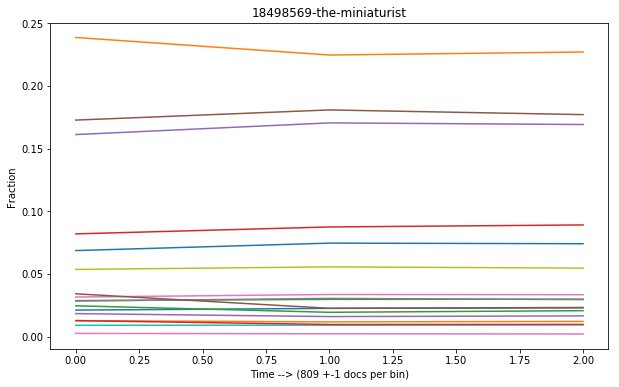

In [174]:
book = file_to_open.split("/")[-1].replace("_network.gt.gz","")


order_dictionary = order_documents(model.documents)

bins,split_count = calculate_bin_indices(order_dictionary,len(model.documents),bins=3)
count_topics = len(model.topics())


#Binary counts
values = calc_topic_fractions(bins,count_topics,binary=True)

plt.figure(figsize=(10,6))
plt.title(book)
plt.xlabel("Time --> ({} +-1 docs per bin)".format(split_count))
plt.ylabel("Fraction")
plt.plot(values)
plt.savefig(directory +"/"+book+"_trends_binary.png", dpi=300)

#Topic weighting version
plt.clf()
values = calc_topic_fractions(bins,count_topics)
plt.title(book)
plt.xlabel("Time --> ({} +-1 docs per bin)".format(split_count))
plt.ylabel("Fraction")
plt.plot(values)
plt.savefig(directory +"/"+book+"_trends_weighted.png", dpi=300)

In [180]:
import pickle

In [181]:
with open('tmp.pkl','wb') as f:
    pickle.dump(model,f)

In [182]:
with open('tmp.pkl','rb') as f:
    model_read = pickle.load(f)

In [184]:
model_read.topics()

{0: [('i', 0.20865241173545498),
  ('this', 0.18657384385877673),
  ('book', 0.1774241670810542),
  ('read', 0.12501243162605669),
  ('me', 0.09676777722526106),
  ('really', 0.07976131277971159),
  ('end', 0.06822476379910493),
  ('think', 0.05758329189457981)],
 1: [('by', 0.011669362271960488),
  ('novel', 0.010034608093772282),
  ('into', 0.009512878036903706),
  ('when', 0.009217231004678179),
  ('century', 0.008747673953496462),
  ('which', 0.00857376393454027),
  ('seem', 0.008399853915584076),
  ('burton', 0.007652040834072451),
  ('set', 0.007043355767725779),
  ('than', 0.006973791760143302)],
 2: [('the', 0.4802645615532323),
  ('at', 0.18561979944527415),
  ('find', 0.14913590783016856),
  ('make', 0.1297205035203755),
  ("'", 0.055259227650949434)],
 3: [('not', 0.1252386677038399),
  ('it', 0.09709355773990525),
  ('do', 0.09574994696273248),
  ('character', 0.08344530089809774),
  ('so', 0.06746340428541121),
  ('like', 0.06307899017042642),
  ('feel', 0.0534615656601371

In [170]:
def entropy(lst):
    return -np.nansum(lst*np.log(lst))
    

In [171]:
import numpy as np

In [175]:
entropy(values[0]) - entropy(values[-1])

0.01685017997430549

In [185]:
import pandas

In [186]:
data = {"name": "blah","text": "ten words","word_count": 10,"delta": 200,"likes": 1,"raw_text":"raw_text"}

In [187]:
a = pandas.Series(data)

In [188]:
a

name               blah
text          ten words
word_count           10
delta               200
likes                 1
raw_text       raw_text
dtype: object